In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv('data1.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


# understanding data


In [6]:
#print('Unique elements in Seller_Type are',data['Seller_Type'].unique())
print('Unique elements in Fuel_Type are',data['Fuel_Type'].unique())
print('Unique elements in Transmission are',data['Transmission'].unique())
print('Unique elements in Owner are',data['Owner'].unique())
print('Unique elements in Year are',data['Year'].unique())

Unique elements in Fuel_Type are ['Petrol' 'Diesel' 'CNG']
Unique elements in Transmission are ['Manual' 'Automatic']
Unique elements in Owner are [0 1 3]
Unique elements in Year are [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [7]:
print('Unique elements in Car_Name are',data['Car_Name'].nunique())



Unique elements in Car_Name are 98


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:

data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# data exploration

In [11]:
data_numeric =data.select_dtypes(include=['float64', 'int'])
data_numeric.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [37]:
data.Selling_Price.describe()
#Max selling price is 35
#Min selling price is 10

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

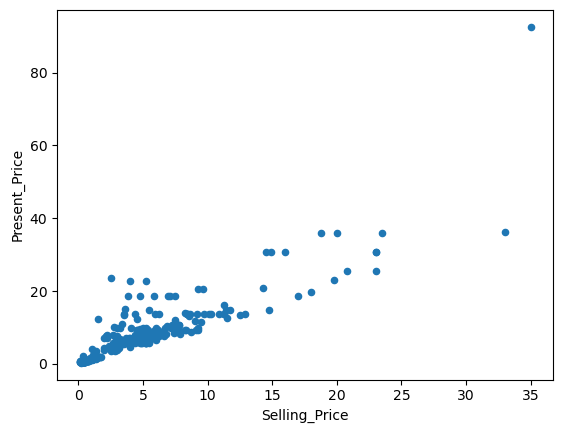

In [38]:
data.plot.scatter(x='Selling_Price',y='Present_Price')

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

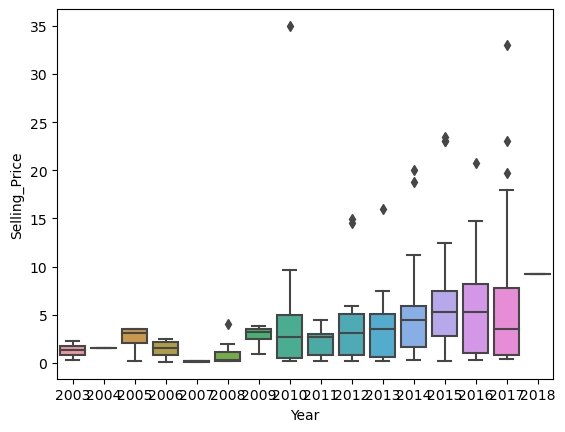

In [39]:
sns.boxplot(y='Selling_Price',x='Year',data=data)

<Figure size 2000x1000 with 0 Axes>

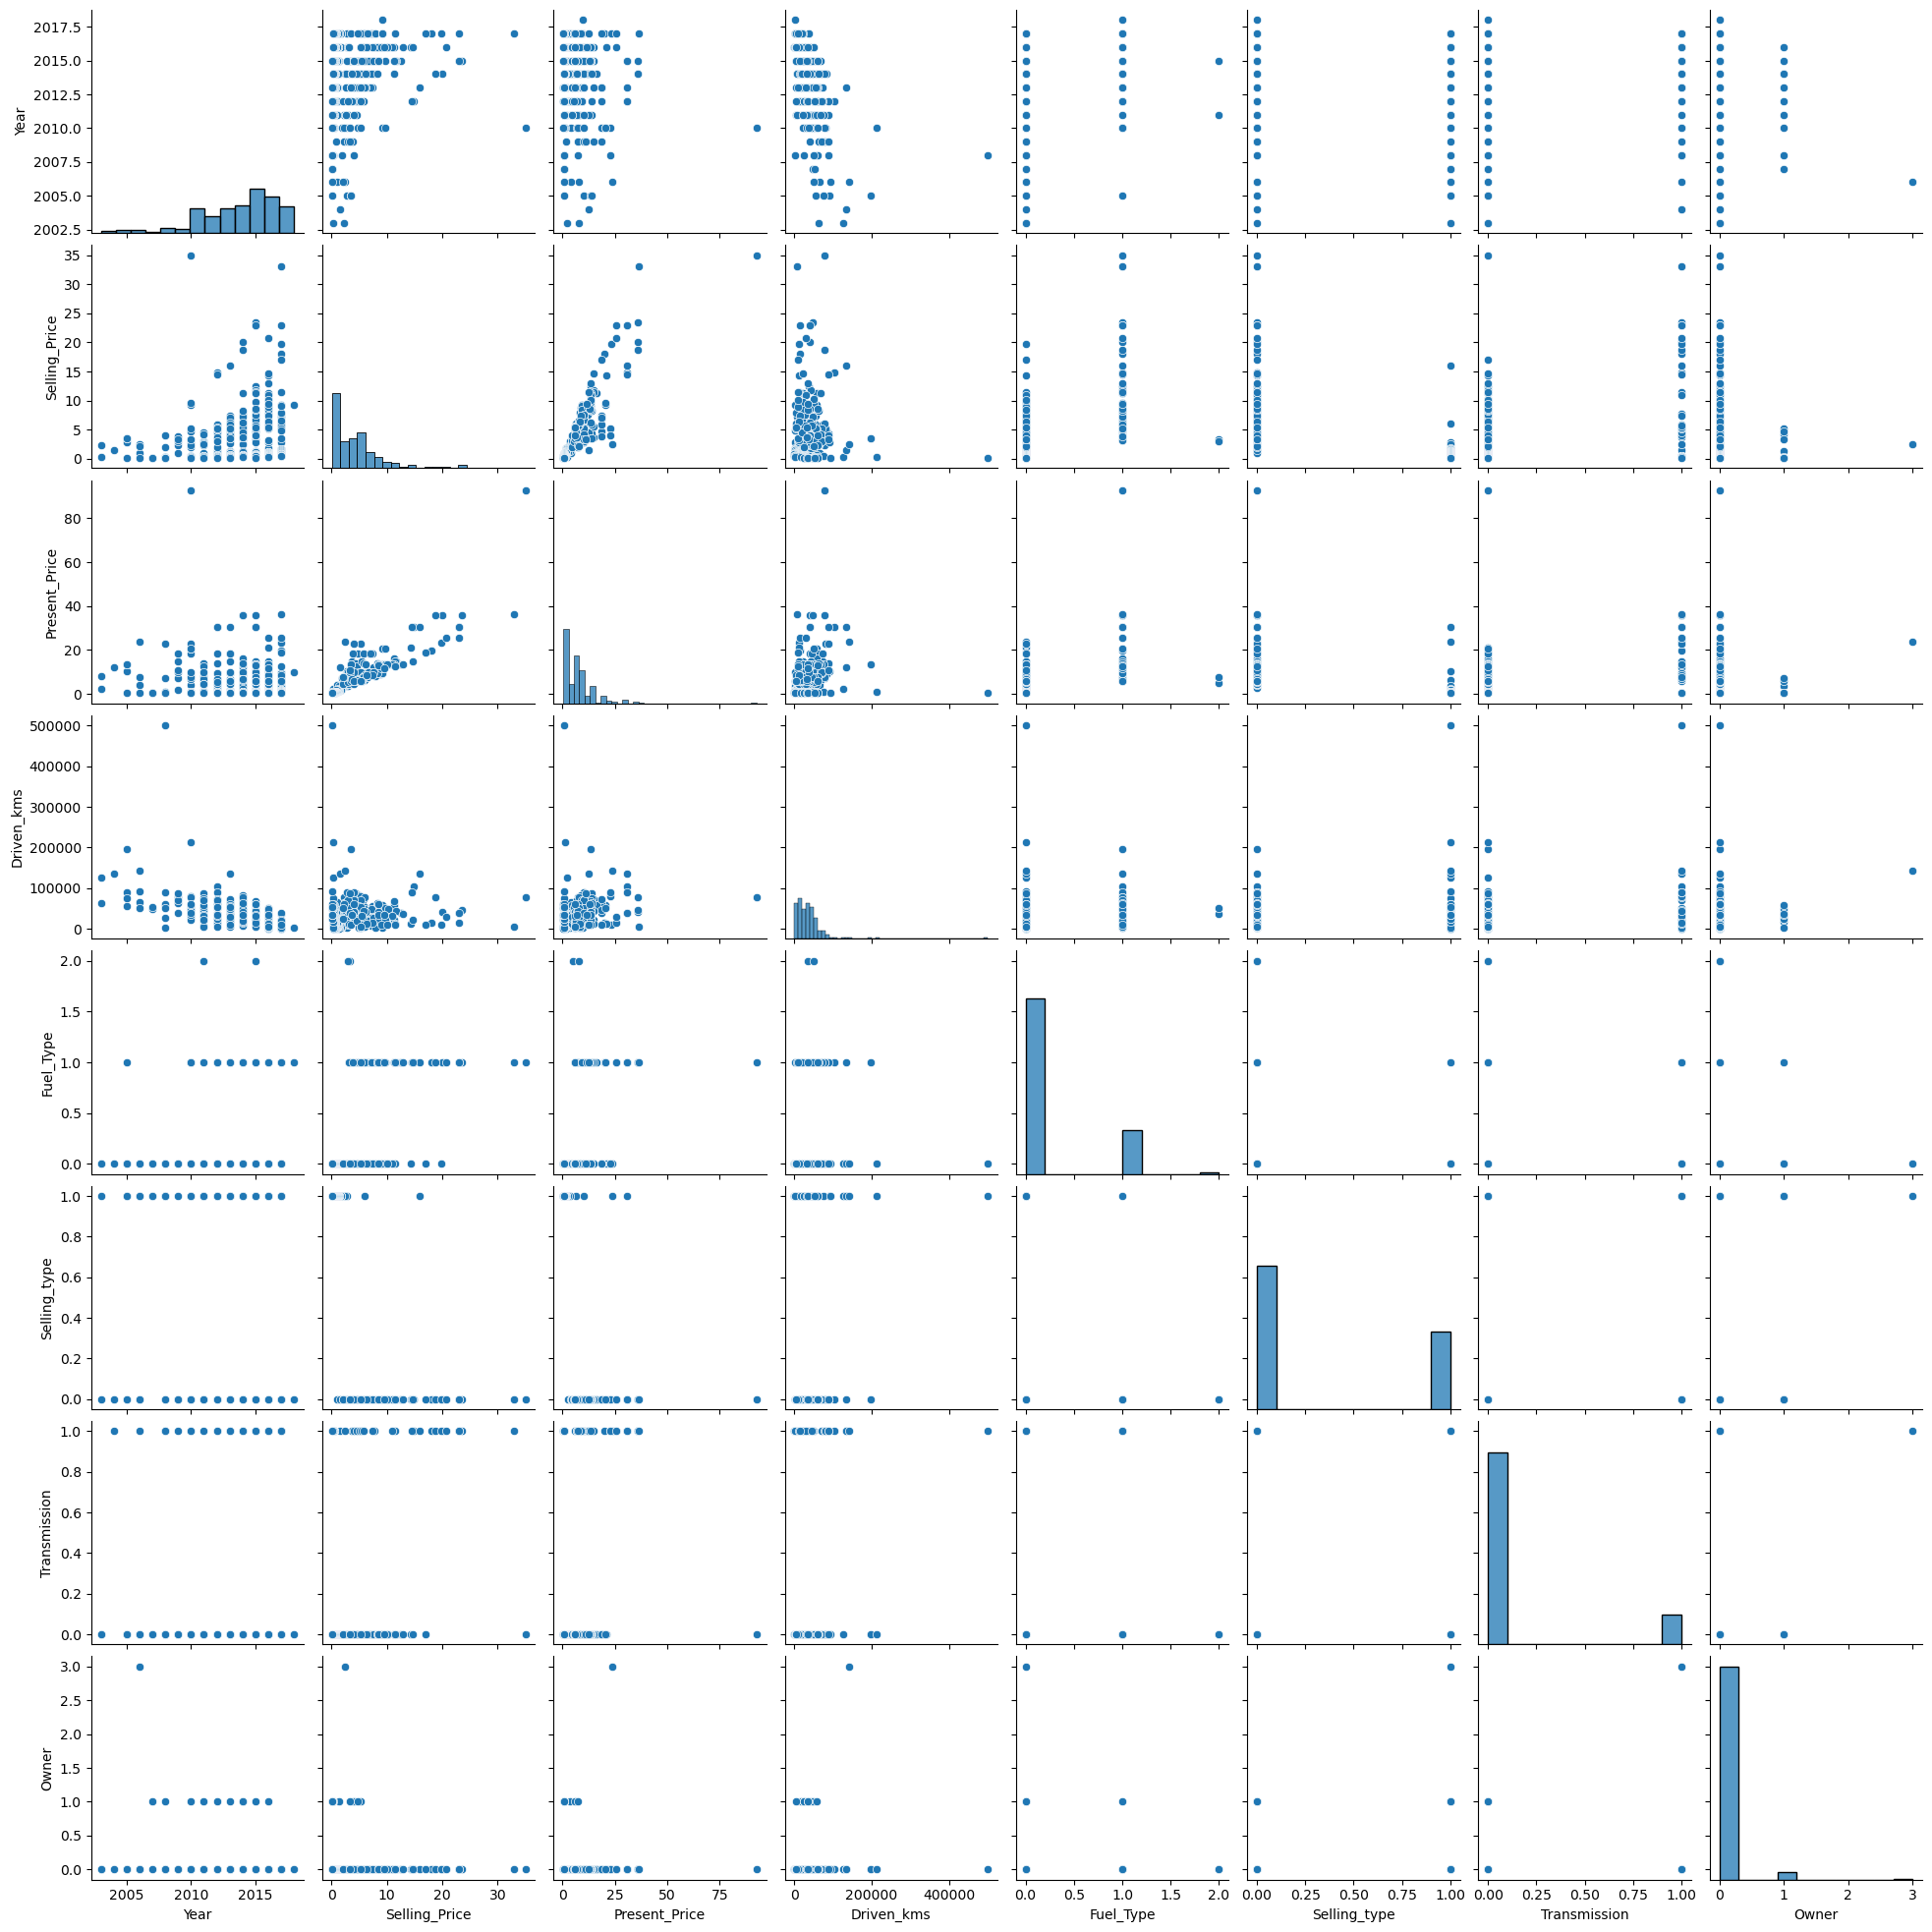

In [12]:
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

In [13]:
# correlation matrix
cor = data_numeric.corr()
cor

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.440493,-0.512121,0.348776,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440493,0.166801,1.000000,-0.352415,0.080466,-0.055705
Selling_type,-0.039896,-0.550724,-0.512121,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348776,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008058,0.089216,-0.055705,0.124269,0.050316,1.000000


D:\misc\pava\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

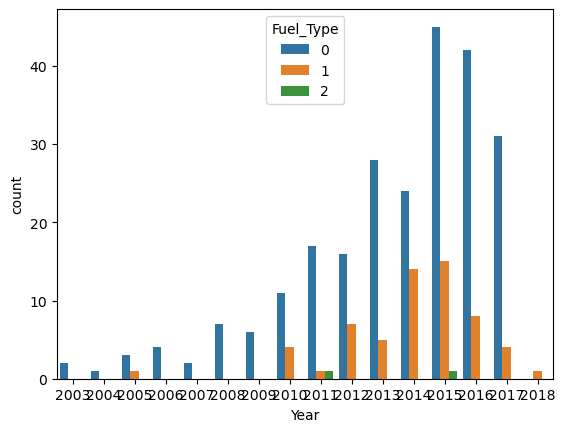

In [40]:
sns.countplot('Year',hue='Fuel_Type',data=data)
#Selling of petrol car and bike car more than diesel and cng

# data cleaning


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [16]:
dataset=data[['Year','Selling_Price','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner']]
dataset.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


In [17]:
#Let's make a feature variable 'Present_Year' which has all the element values as 2023.
#On subtracting 'Present_Year' and 'Year',
# we can make another feature variable as 'Number_of_Years_Old', which gives us idea about how old the car is.
dataset['Present_Year']=2023
dataset['Number_of_Years_Old']=dataset['Present_Year']- dataset['Year']
dataset.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Present_Year,Number_of_Years_Old
0,2014,3.35,5.59,27000,0,0,0,0,2023,9
1,2013,4.75,9.54,43000,1,0,0,0,2023,10
2,2017,7.25,9.85,6900,0,0,0,0,2023,6
3,2011,2.85,4.15,5200,0,0,0,0,2023,12
4,2014,4.60,6.87,42450,1,0,0,0,2023,9


In [18]:
dataset.drop(labels=['Year', 'Present_Year'],axis=1,inplace=True)
dataset.head()
#dropping "year" and "present year"

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Number_of_Years_Old
0,3.35,5.59,27000,0,0,0,0,9
1,4.75,9.54,43000,1,0,0,0,10
2,7.25,9.85,6900,0,0,0,0,6
3,2.85,4.15,5200,0,0,0,0,12
4,4.60,6.87,42450,1,0,0,0,9


In [19]:
dataset.corr()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Number_of_Years_Old
Selling_Price,1.000000,0.878914,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,0.878914,1.000000,0.203618,0.440493,-0.512121,0.348776,0.008058,0.047192
Driven_kms,0.029187,0.203618,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440493,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Selling_type,-0.550724,-0.512121,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,0.367128,0.348776,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.088344,0.008058,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
Number_of_Years_Old,-0.236141,0.047192,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


In [ ]:

#encoding the categorical values
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Fuel_Type=dataset[['Fuel_Type']]
Fuel_Type=pd.get_dummies(Fuel_Type, drop_first=True)

Seller_Type=dataset[['Selling_type']]
Seller_Type=pd.get_dummies(Seller_Type, drop_first=True)

Transmission=dataset[['Transmission']]
Transmission=pd.get_dummies(Transmission, drop_first=True)

dataset=pd.concat([dataset,Fuel_Type, Seller_Type, Transmission], axis=1)

dataset.drop(labels=['Fuel_Type', 'Selling_type', 'Transmission'], axis=1, inplace=True)

dataset.head()

In [20]:
dataset.columns


Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Number_of_Years_Old'],
      dtype='object')

In [21]:
dataset.corr()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Number_of_Years_Old
Selling_Price,1.000000,0.878914,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,0.878914,1.000000,0.203618,0.440493,-0.512121,0.348776,0.008058,0.047192
Driven_kms,0.029187,0.203618,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440493,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Selling_type,-0.550724,-0.512121,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,0.367128,0.348776,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.088344,0.008058,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
Number_of_Years_Old,-0.236141,0.047192,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


# data visualization and preparation

<AxesSubplot:>

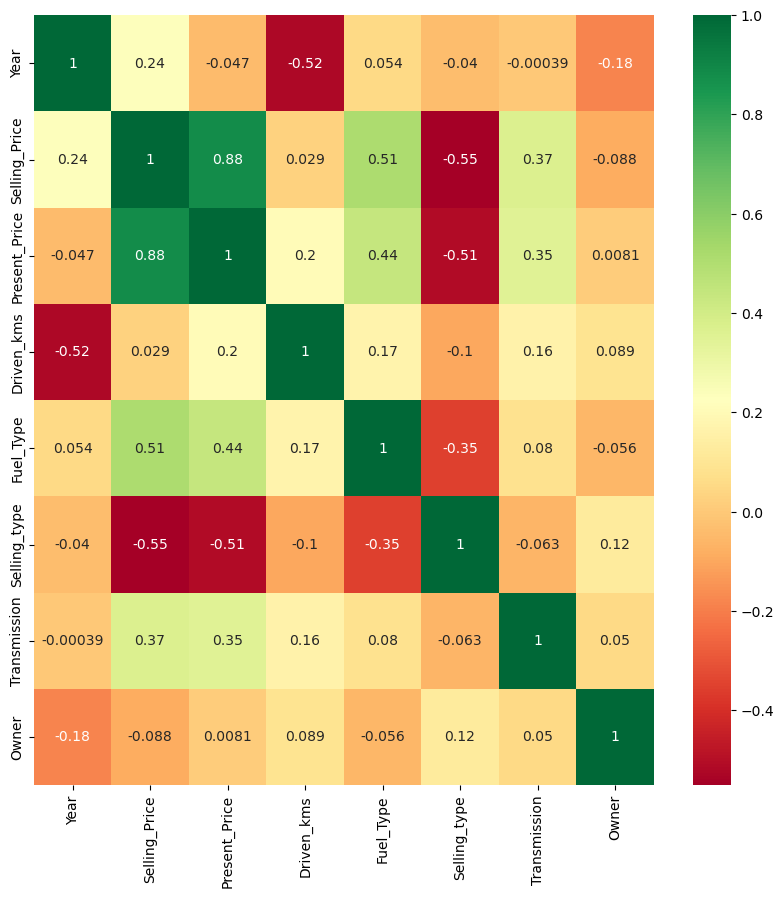

In [22]:
#Correlations of features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
sell=dataset['Selling_Price']
dataset.drop(['Selling_Price'], axis=1, inplace=True)
dataset=dataset.join(sell)
dataset.head()

,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Number_of_Years_Old,Selling_Price
0,5.59,27000,0,0,0,0,9,3.35
1,9.54,43000,1,0,0,0,10,4.75
2,9.85,6900,0,0,0,0,6,7.25
3,4.15,5200,0,0,0,0,12,2.85
4,6.87,42450,1,0,0,0,9,4.60


In [24]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

[0.40875238 0.03890084 0.13647528 0.25672531 0.07769413 0.00067763
 0.08077444]


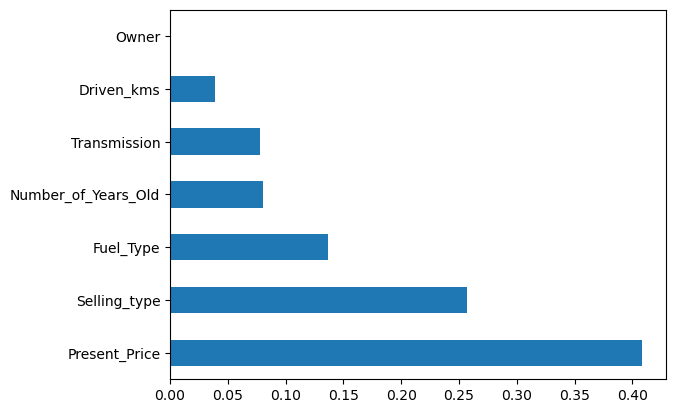

In [25]:
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# 4 model building

In [26]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9146855087663969

D:\misc\pava\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


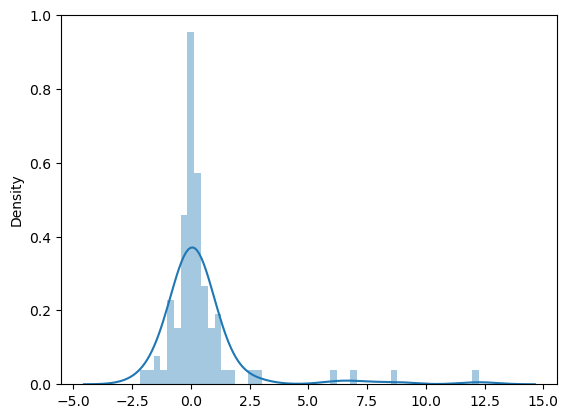

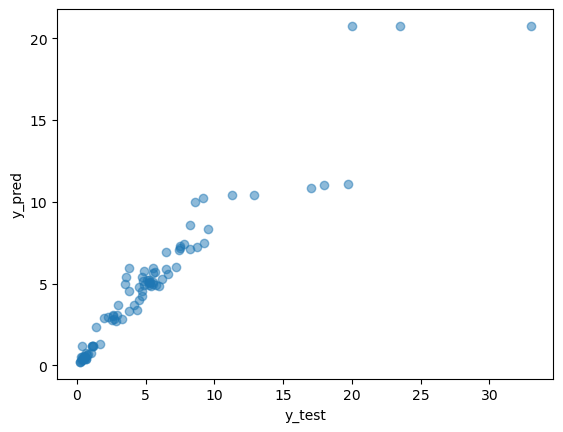

In [43]:


sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


# ERROR VALUES

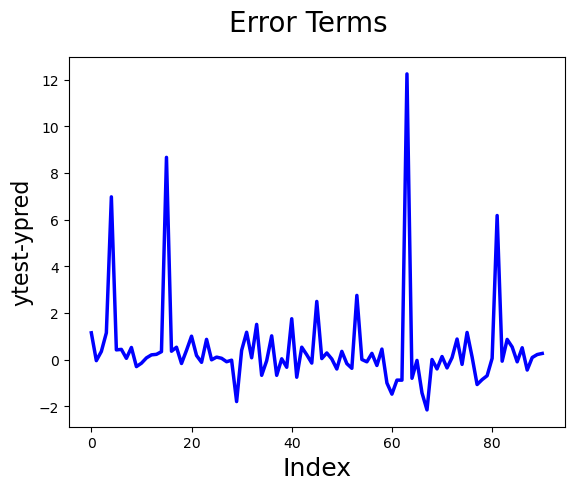

In [30]:
# Error terms
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

D:\misc\pava\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


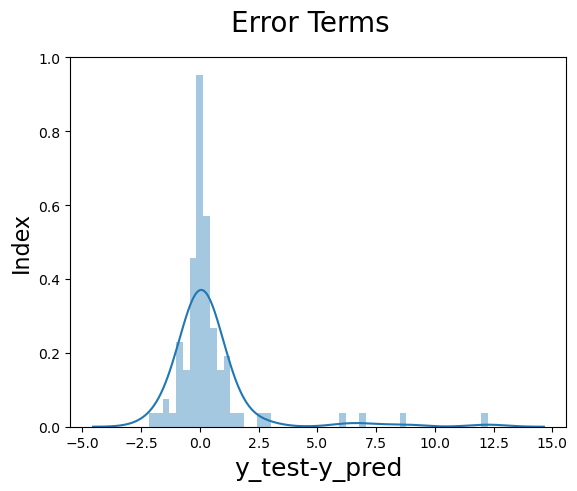

In [31]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()


In [32]:
# mean
np.mean(y_test-y_pred)

0.45135555563584956